### How `gumbel_softmax` works (+`Categorical`)

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("Torch version:[%s]"%(torch.__version__))

Torch version:[1.12.0.dev20220519]


In [2]:
def np2torch(x_np,device='cpu'):
    """ Numpy tensor to Torch tensor """
    return torch.tensor(x_np,dtype=torch.float32,device=device)
def torch2np(x_torch):
    """ Torch tensor to Numpy tensor """
    return x_torch.detach().cpu().numpy()
print ("Done.")

Done.


In [3]:
# Logits and temperatures to check
logit_torch = np2torch(np.array([5,4,3,2,1]).reshape((1,-1)))
taus = [10,4,1,0.1] # different temperatures

### `softmax` vs. `gumbel_softmax`

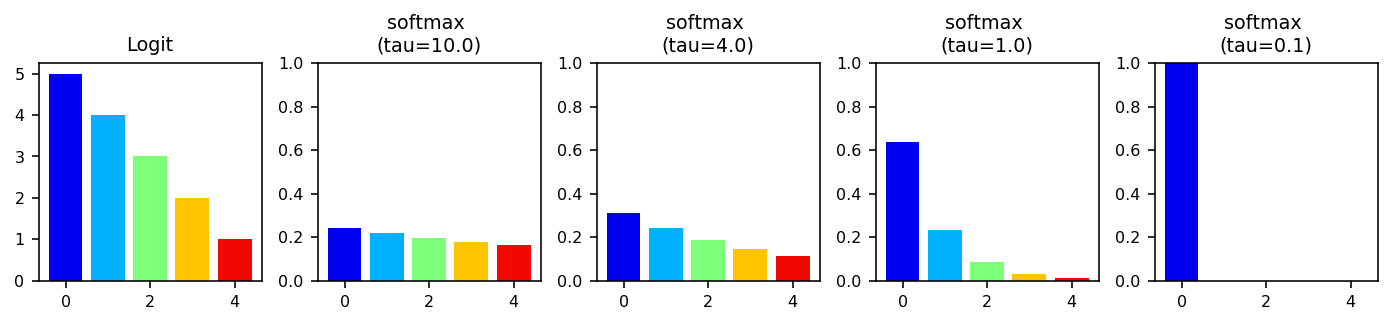

Trial:[1]


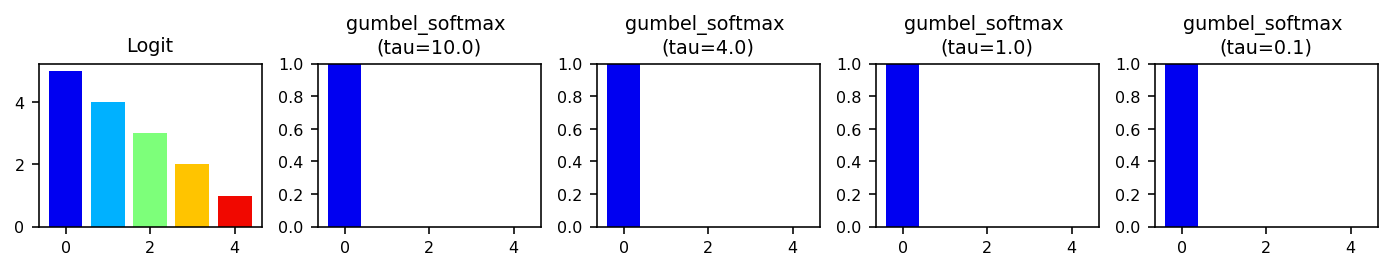

Trial:[2]


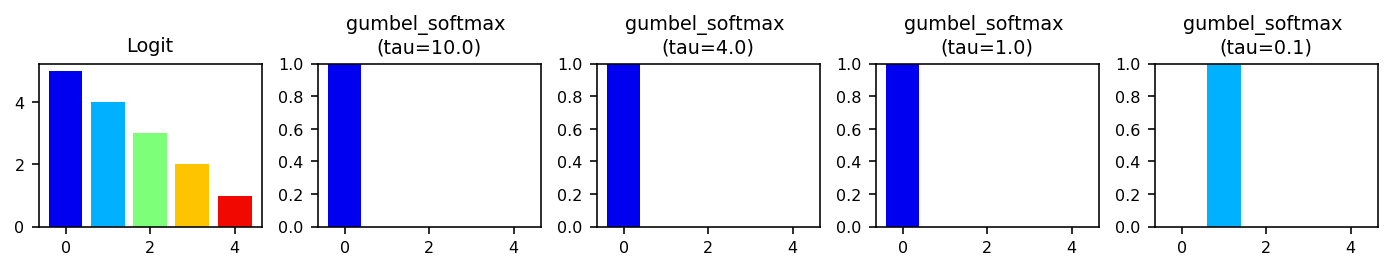

Trial:[3]


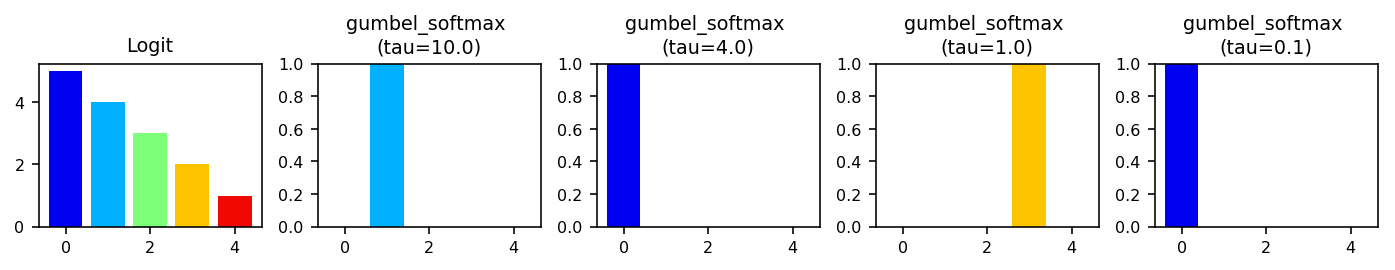

Trial:[4]


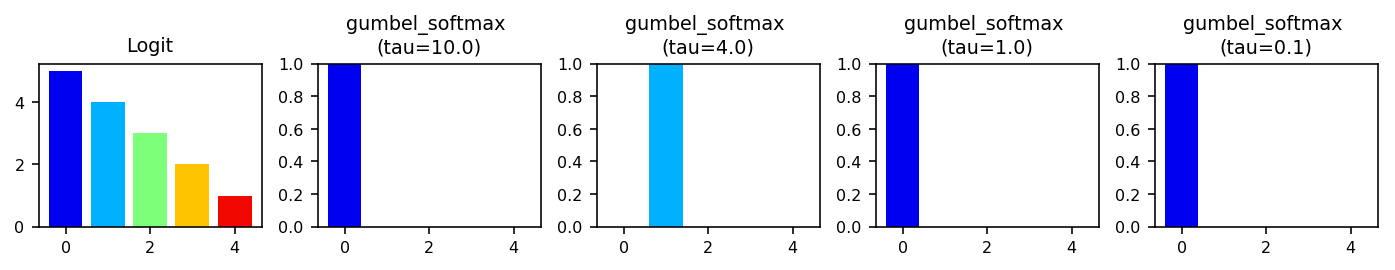

Trial:[5]


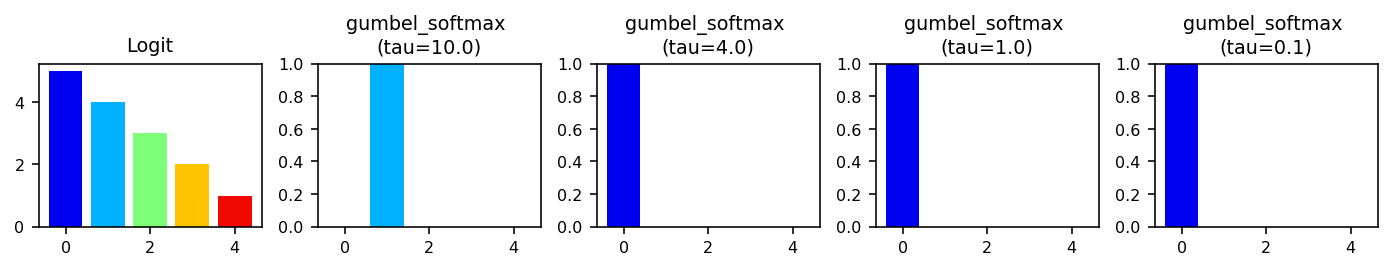

In [4]:
bar_colors = cm.get_cmap('jet')(np.linspace(0.1,0.9,5))
nrow,ncol = 1,len(taus)+1
# Plot `softmax` results
fig = plt.figure(figsize=(12,2)) 
plt.rcParams.update({'font.size':8}) # smaller fontsize (once is enough)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(nrow,ncol,1)
plt.bar(np.arange(5),torch2np(logit_torch.squeeze()),color=bar_colors)
plt.title('Logit')
for t_idx,tau in enumerate(taus): # for each temperature, plot softmax results
    softmax_torch = F.softmax(logit_torch/tau,dim=1)
    plt.subplot(nrow,ncol,t_idx+2)
    plt.bar(np.arange(5),torch2np(softmax_torch.squeeze()),color=bar_colors)
    plt.ylim(ymin=0.0,ymax=1.0)
    plt.title('softmax \n(tau=%.1f)'%(tau))
plt.show()
# Plot `gumbel_softmax` results
for n_trial in [1,2,3,4,5]:
    print ("Trial:[%d]"%(n_trial))
    fig = plt.figure(figsize=(12,1.5))
    plt.subplots_adjust(wspace=0.25,hspace=0.25)
    plt.subplot(nrow,ncol,1)
    plt.bar(np.arange(5),torch2np(logit_torch.squeeze()),color=bar_colors)
    plt.title('Logit')
    for t_idx,tau in enumerate(taus): # for each temperature, plot softmax results
        gumbel_softmax_torch = F.gumbel_softmax(logit_torch,tau=tau,dim=1,hard=True)
        plt.subplot(nrow,ncol,t_idx+2)
        plt.bar(np.arange(5),torch2np(gumbel_softmax_torch.squeeze()),color=bar_colors)
        plt.ylim(ymin=0.0,ymax=1.0)
        plt.title('gumbel_softmax \n(tau=%.1f)'%(tau))
    plt.show()

### Sample from `Categorical`

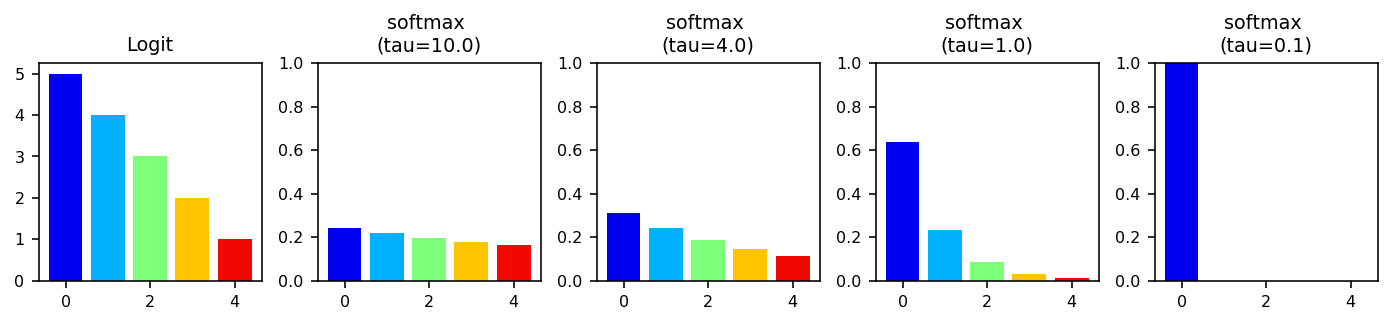

Trial:[1]


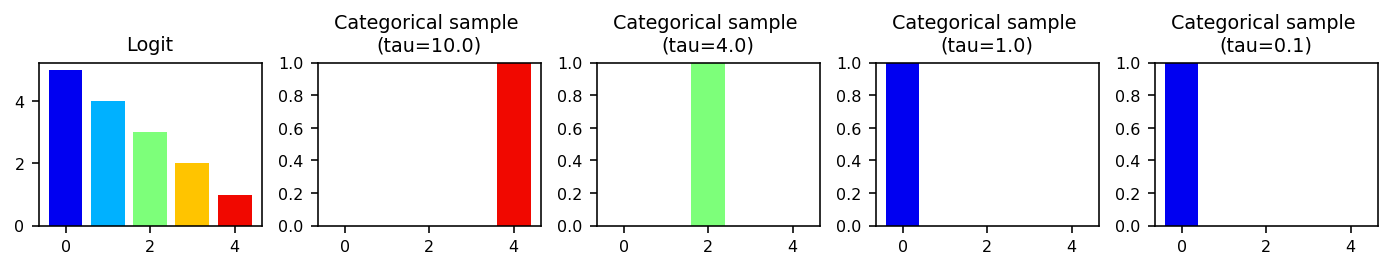

Trial:[2]


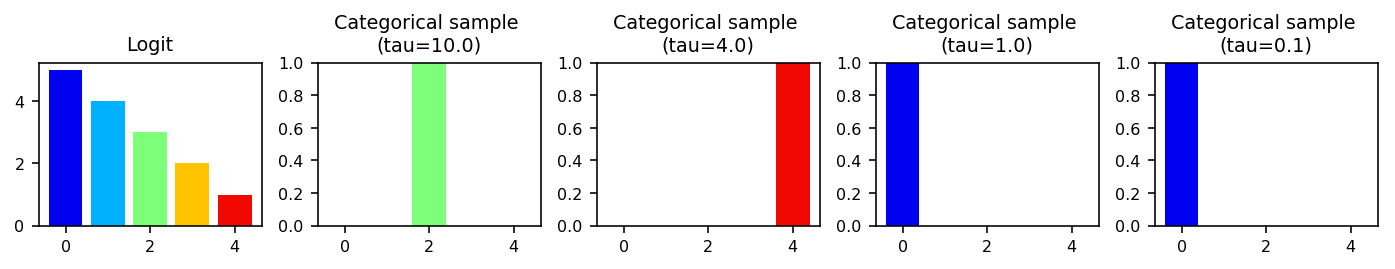

Trial:[3]


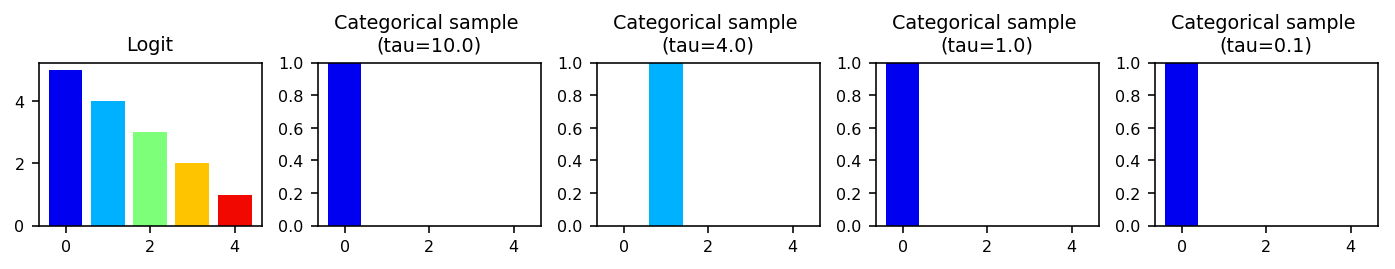

Trial:[4]


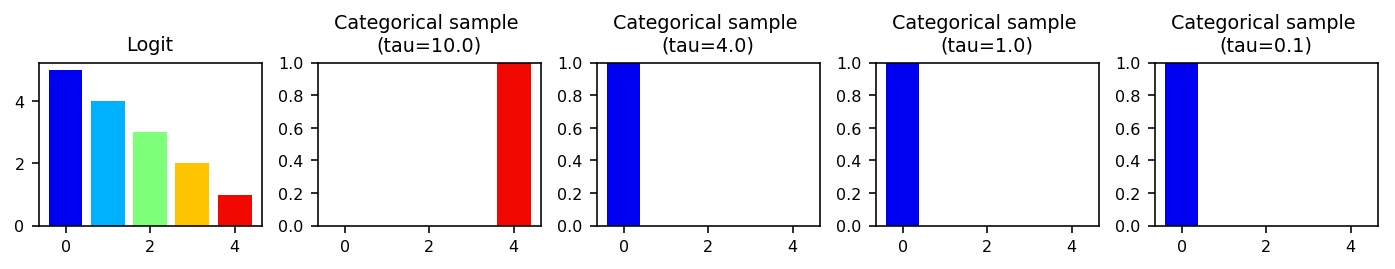

Trial:[5]


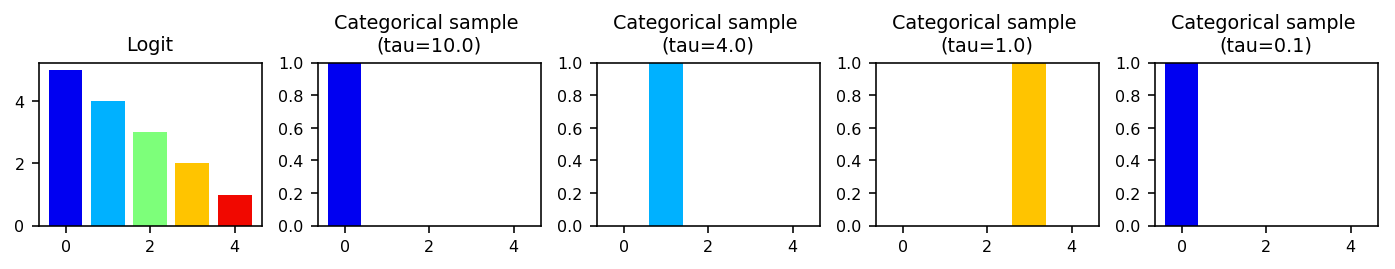

In [5]:
# Plot `softmax` results
fig = plt.figure(figsize=(12,2))
plt.subplots_adjust(wspace=0.25,hspace=0.45)
plt.subplot(nrow,ncol,1)
plt.bar(np.arange(5),torch2np(logit_torch.squeeze()),color=bar_colors)
plt.title('Logit')
for t_idx,tau in enumerate(taus): # for each temperature, plot softmax results
    softmax_torch = F.softmax(logit_torch/tau,dim=1)
    plt.subplot(nrow,ncol,t_idx+2)
    plt.bar(np.arange(5),torch2np(softmax_torch.squeeze()),color=bar_colors)
    plt.ylim(ymin=0.0,ymax=1.0)
    plt.title('softmax \n(tau=%.1f)'%(tau))
plt.show()
# Plot sampling results
for n_trial in [1,2,3,4,5]:
    print ("Trial:[%d]"%(n_trial))
    fig = plt.figure(figsize=(12,1.5))
    plt.subplots_adjust(wspace=0.25,hspace=0.45)
    plt.subplot(nrow,ncol,1)
    plt.bar(np.arange(5),torch2np(logit_torch.squeeze()),color=bar_colors)
    plt.title('Logit')
    for t_idx,tau in enumerate(taus): # for each temperature, plot softmax results
        softmax_torch = F.softmax(logit_torch/tau,dim=1)
        C = torch.distributions.Categorical(probs=softmax_torch)
        cat_vec = F.one_hot(C.sample()[0],num_classes=5) # sample from Categorical 
        plt.subplot(nrow,ncol,t_idx+2)
        plt.bar(np.arange(5),torch2np(cat_vec.squeeze()),color=bar_colors)
        plt.ylim(ymin=0.0,ymax=1.0)
        plt.title('Categorical sample \n(tau=%.1f)'%(tau))
    plt.show()